In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score, LearningCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
pd.set_option('expand_frame_repr', False)
import numpy as np
import missingno as msno #to visualize missing data

Violation of rule of thumb. Since the number of attributes is 23 expected rows : 230, while the rows we have in the dataset equal to 73. (dimensionality curse which we will try to fix in the data augmentation section)

In [ ]:
tourist_df = pd.read_csv('non-verbal tourist data.csv')
tourist_df

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,F,36,england,no,indiferent,dislikes,dislikes,likes,likes,dislikes,...,7,4,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,4
69,M,38,russia,no,dislikes,dislikes,dislikes,likes,likes,dislikes,...,2,5,C,dislikes,dislikes,dislikes,dislikes,dislikes,dislikes,5
70,F,46,canada,no,dislikes,indiferent,indiferent,indiferent,likes,dislikes,...,1,2,A,dislikes,dislikes,indiferent,indiferent,dislikes,indiferent,5
71,M,39,germany,no,dislikes,dislikes,?,likes,likes,dislikes,...,4,4,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,5


In [ ]:
tourist_df

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,F,36,england,no,indiferent,dislikes,dislikes,likes,likes,dislikes,...,7,4,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,4
69,M,38,russia,no,dislikes,dislikes,dislikes,likes,likes,dislikes,...,2,5,C,dislikes,dislikes,dislikes,dislikes,dislikes,dislikes,5
70,F,46,canada,no,dislikes,indiferent,indiferent,indiferent,likes,dislikes,...,1,2,A,dislikes,dislikes,indiferent,indiferent,dislikes,indiferent,5
71,M,39,germany,no,dislikes,dislikes,?,likes,likes,dislikes,...,4,4,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,5


#Central Tendency

In [ ]:
tourist_df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


## Missing Value Visualisation

Interpretations:The tourist_df=="?" function returns a DataFrame of the same shape as tourist_df, but with boolean values indicating whether each cell contains a missing ('?') value. If a cell has '?', it returns True; otherwise, it returns False.

So our data doesn't have missing value.

In [ ]:
tourist_df== "?"

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The data has some values incorrect "?" in the attribute GImg3, Authoritative -anarchic and PImg5

In [ ]:
print('Number of missing values per column')
for colm in tourist_df.columns:
  n_mv=(tourist_df[colm]=="?").sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column
sex: 0
age: 0
country: 0
returning: 0
GImg1: 0
GImg2: 0
GImg3: 1
PImg1: 0
PImg2: 0
PImg3: 0
PImg4: 0
PImg5: 2
Tense - relaxed: 0
Authoritative -anarchic : 1
Hostile - friendly: 0
TAudio1: 0
TAudio2: 0
TAudio3: 0
QAudio1: 0
QAudio2: 0
QAudio3: 0
Proxemics: 0
Type of Client: 0


The attribute **Authoritative -anarchic** is numeric attribute but has this value '?' which makes it categorical so we have to change that value with the mode which is 2.

In [ ]:
print(tourist_df['Authoritative -anarchic '].value_counts())
# Remplacement de '?' par 2
tourist_df['Authoritative -anarchic '] = tourist_df['Authoritative -anarchic '].replace('?', 2)

# Conversion en type numérique
tourist_df['Authoritative -anarchic '] = pd.to_numeric(tourist_df['Authoritative -anarchic '])

Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: count, dtype: int64


In [ ]:
tourist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     int64 
 14  Hostile - friendly        73

**Interpretation:**  Visualization of missing value rates using the bar plot and that shows that all the attribue has 73 value whiche is the number of column.

<Axes: >

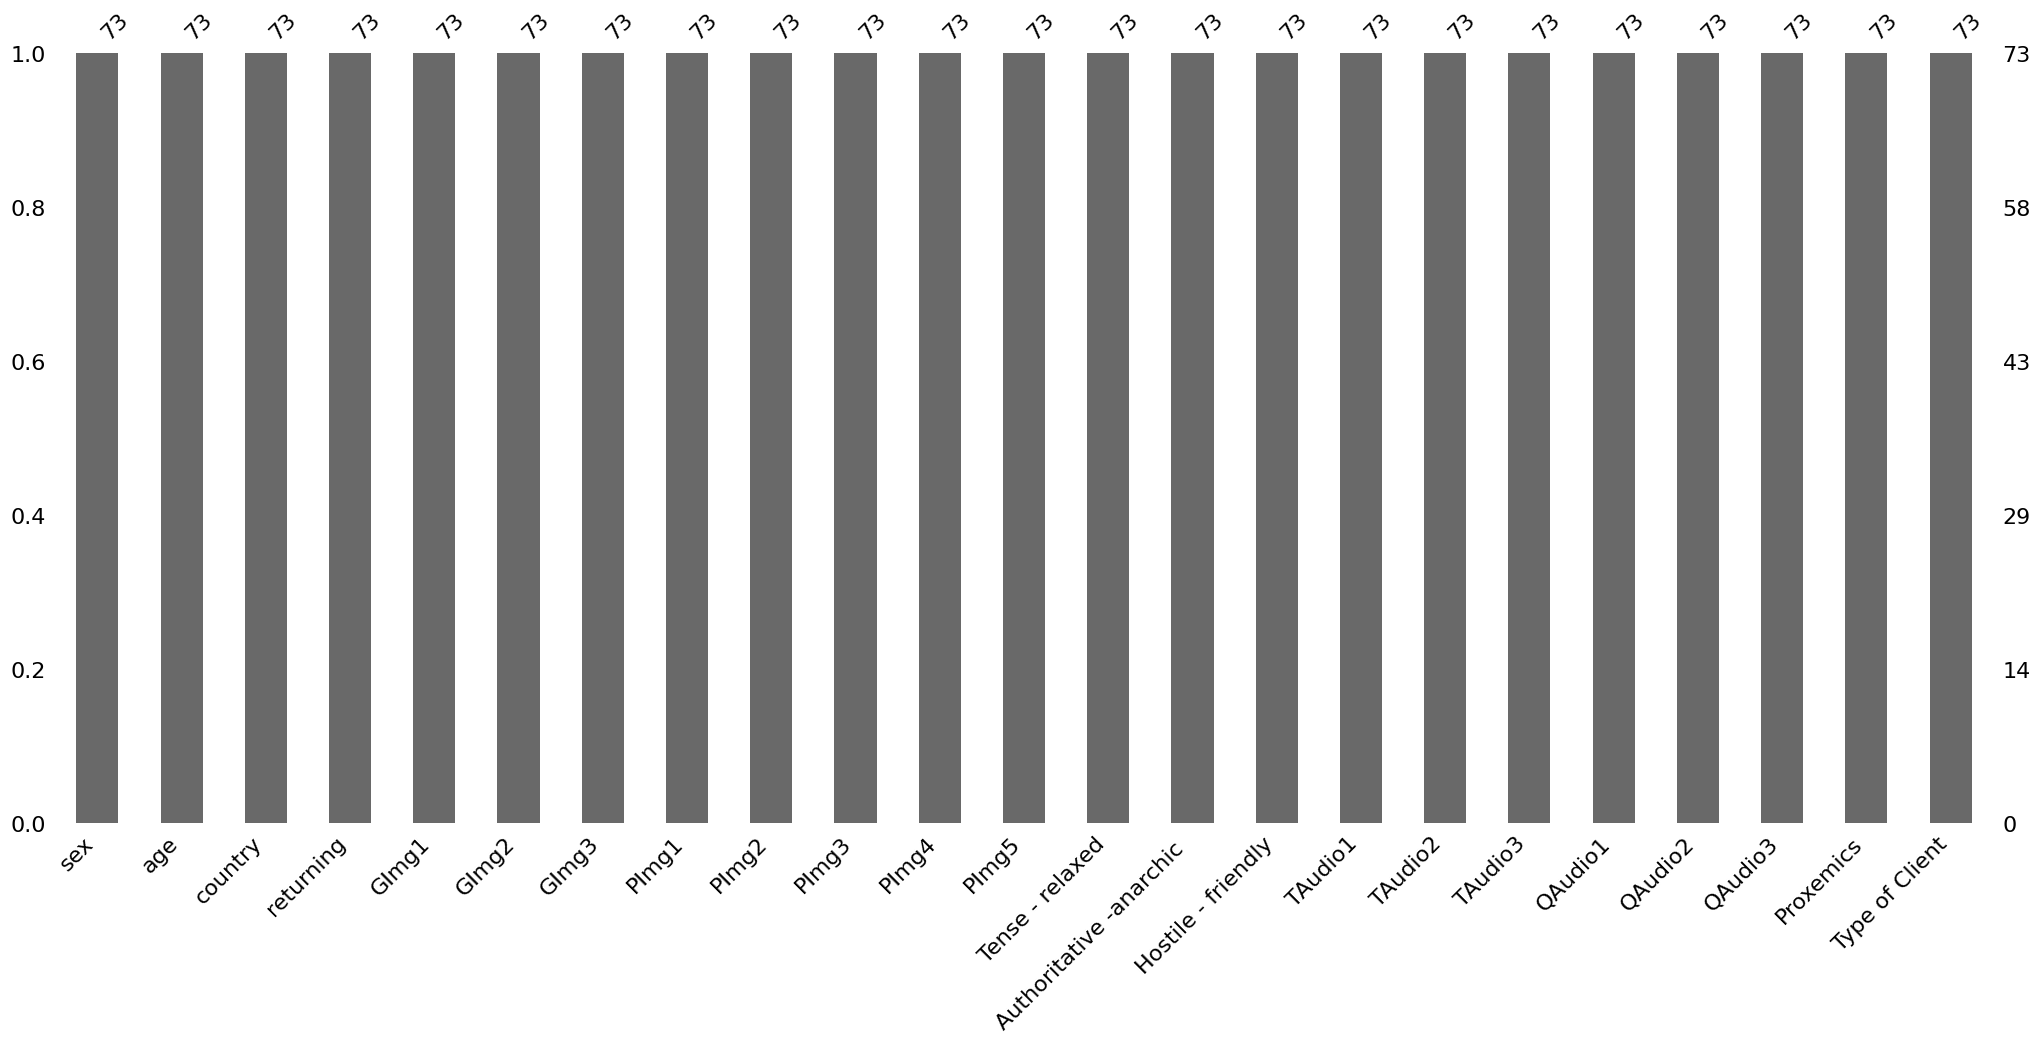

In [ ]:
msno.bar(tourist_df)

## **Dispersion**

Select only numeric columns and calcul the range, the quartiles and the interquartiles range.

In [ ]:
number_split=tourist_df.loc[:,tourist_df.dtypes!=object] # Select only columns with numeric data types
number_split.head()

,age,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Type of Client
0,42,4,8,3,0
1,60,2,9,1,0
2,25,5,10,5,0
3,43,3,2,1,0
4,30,3,9,3,0


In [ ]:
#the range
def range_imp(dat):
  return (dat.max() - dat.min())
for column_name in number_split.columns:
    print('The column:', column_name , ', the range:' , range_imp(number_split[column_name]))

The column: age , the range: 57
The column: Tense - relaxed , the range: 4
The column: Authoritative -anarchic  , the range: 9
The column: Hostile - friendly , the range: 5
The column: Type of Client , the range: 5


In [ ]:
#Quartiles
for column_name in number_split.columns:
    print(number_split[column_name].quantile([0.25,0.5,0.75]))

0.25    36.0
0.50    47.0
0.75    56.0
Name: age, dtype: float64
0.25    1.0
0.50    2.0
0.75    3.0
Name: Tense - relaxed, dtype: float64
0.25    2.0
0.50    4.0
0.75    8.0
Name: Authoritative -anarchic , dtype: float64
0.25    1.0
0.50    2.0
0.75    3.0
Name: Hostile - friendly, dtype: float64
0.25    2.0
0.50    2.0
0.75    3.0
Name: Type of Client, dtype: float64


In [ ]:
#interquartiles range
def interquartiles_range(dat):
  return (dat.quantile(0.75) - dat.quantile(0.25))

for column_name in number_split.columns:
  print("The column : ", column_name, ", the interquantile range is : ", interquartiles_range(number_split[column_name]))

The column :  age , the interquantile range is :  20.0
The column :  Tense - relaxed , the interquantile range is :  2.0
The column :  Authoritative -anarchic  , the interquantile range is :  6.0
The column :  Hostile - friendly , the interquantile range is :  2.0
The column :  Type of Client , the interquantile range is :  1.0


The boxplot show that the data doesn't have outliers in the attribute age, Tense-relaxed, Authoritative -anarchic and Hostile - friendly

<Axes: >

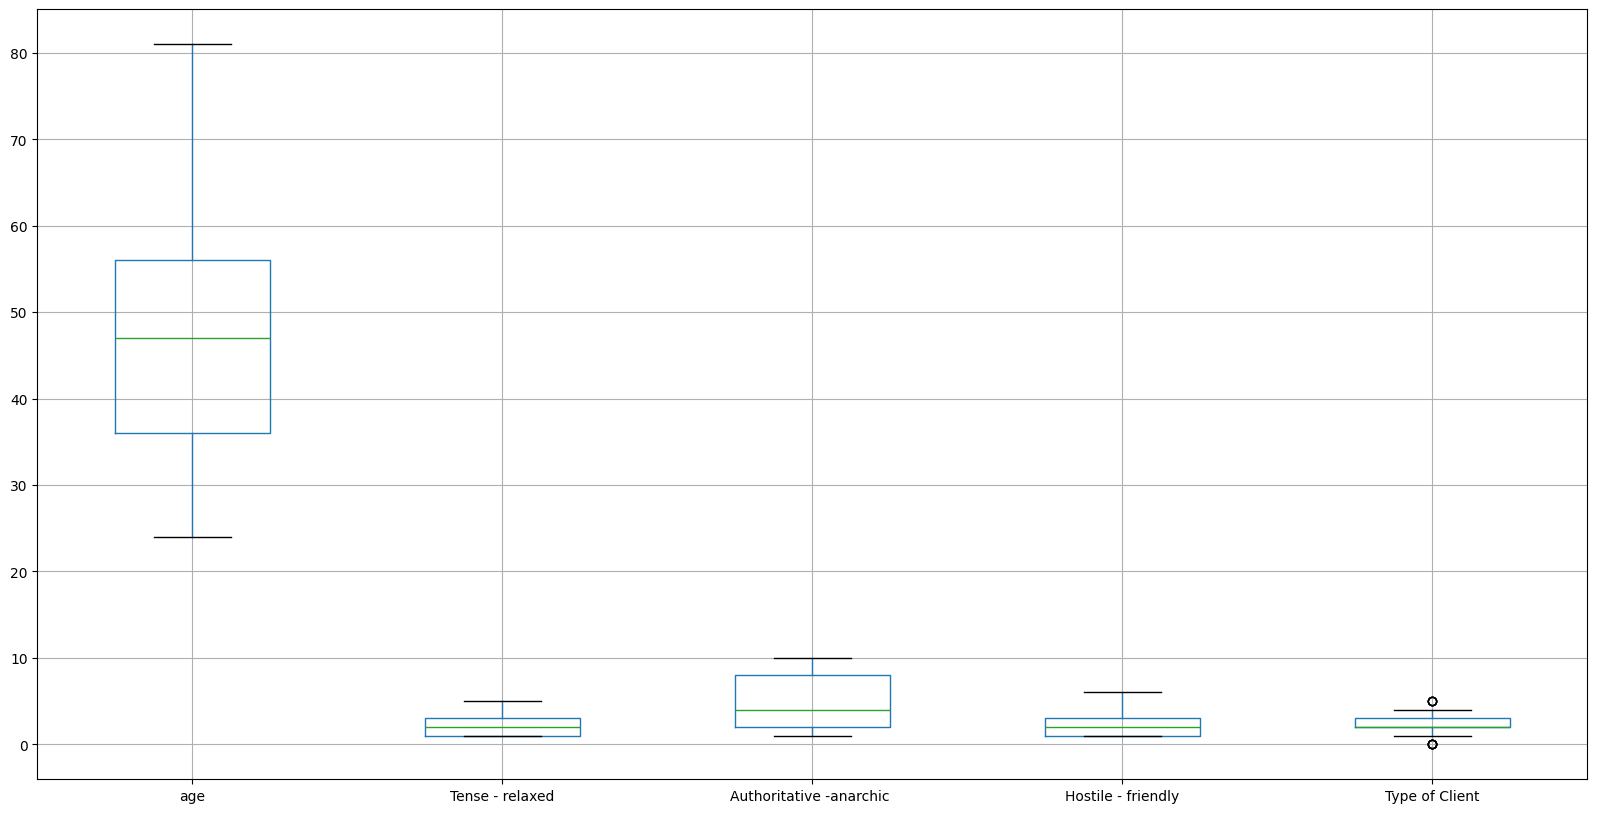

In [ ]:
#boxplots
number_split.boxplot(figsize=(20, 10))  # Change la taille de la figure à 12x6 pouces


In [ ]:
number_split.var()

,0
age,228.472983
Tense - relaxed,2.320015
Authoritative -anarchic,9.499239
Hostile - friendly,2.153349
Type of Client,1.503425


**Age (228.47)**: Even without outliers, this suggests that the data points for age have a high degree of dispersion, meaning there is considerable variation in age within the dataset.

**Tense - relaxed (2.32)**: The lower variance here suggests that the individuals in the dataset tend to have similar levels of tension or relaxation, with relatively little variation.

**Authoritative - anarchic (9.50)**: The high variance indicates that the individuals exhibit a wide range of behaviors or traits, with some being highly authoritative and others more anarchic.

**Hostile - friendly (2.15)**: This suggests moderate variability in how people behave along the hostile-friendly spectrum, though it's less varied than the authoritative-anarchic trait.

In [ ]:
number_split.std()

,0
age,15.115323
Tense - relaxed,1.523160
Authoritative -anarchic,3.082084
Hostile - friendly,1.467429
Type of Client,1.226142


**Interpretation:** The age has a relatively high standard deviation of 15.12, indicating significant variation in age within the dataset. The Tense - relaxed score has a moderate standard deviation of 1.52, showing some variation but with values relatively close to the mean. Authoritative - anarchic has a standard deviation of 3.08, suggesting moderate variability in how individuals fall along this spectrum. The Hostile - friendly score (1.47)

In [ ]:
number_split.skew()

,0
age,0.350822
Tense - relaxed,0.878439
Authoritative -anarchic,0.298399
Hostile - friendly,1.047375
Type of Client,0.132461


**Interpretation:** The skew() results show that most traits have a slight to moderate positive skew, indicating asymmetry with longer right tails. Age (0.35), Authoritative - anarchic (0.30), and Type of Client (0.13) show minimal skew, suggesting near-symmetric distributions. Tense - relaxed (0.88) and Hostile - friendly (1.05) have higher positive skew, indicating that while most values are lower, there are some higher values extending the distribution, creating a right tail.

In [ ]:
number_split.kurtosis()

,0
age,-0.639574
Tense - relaxed,-0.779010
Authoritative -anarchic,-1.386296
Hostile - friendly,-0.041362
Type of Client,-0.150400


**Interpretation:** The kurtosis values are negative for all traits, indicating that the distributions are platykurtic, which means they have lighter tails and are flatter than a normal distribution. Age (-0.64), Tense - relaxed (-0.78), and Hostile - friendly (-0.04) show slight platykurtosis, suggesting moderate flatness with fewer outliers. Authoritative - anarchic (-1.39) has a more pronounced negative kurtosis, indicating an even flatter distribution with fewer extreme values Overall, the data distributions are generally flatter with fewer extreme outliers compared to a normal distribution.

## 2. Noise and outliers

*** Interpretation ***

These plots help us understand the distribution and variability over entries. For instance, columns like age or Hostile - friendly might show sudden spikes or dips. These irregular points could indicate noise or potential outliers if they deviate significantly from the overall trend.
Repeated patterns in the curves can signal stable data, while random fluctuations may indicate noise, particularly if they don’t follow any clear trend.

The current values shown define that there is almost no outliers/noise in the dataset

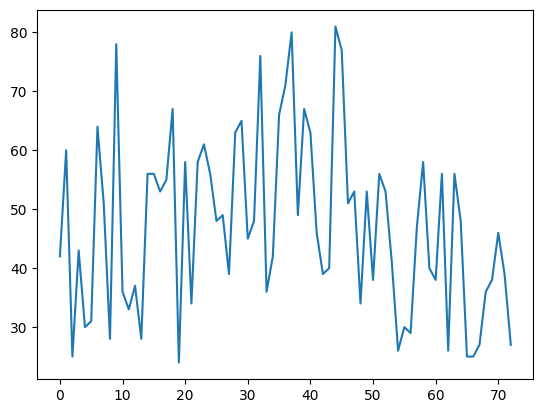

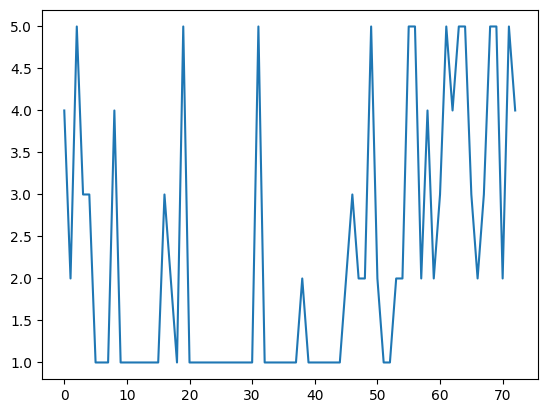

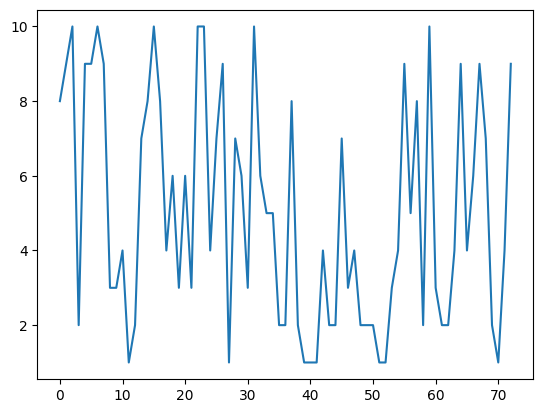

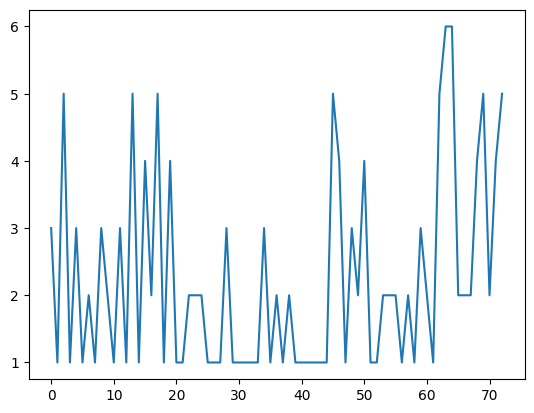

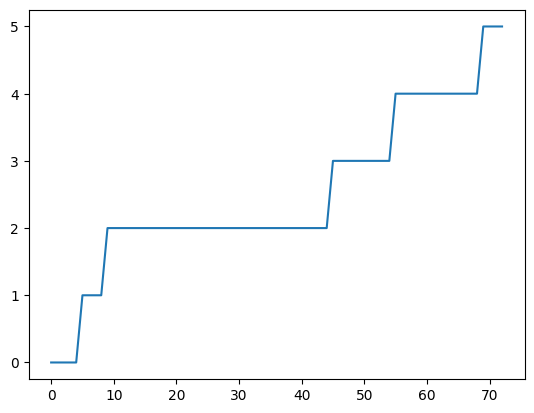

In [ ]:
#Visualization of data curves of the numerical attributes
import matplotlib.pyplot as plt #to visualize the data
for column in number_split.columns:
  number_split[column].plot()
  plt.show()

**Interpretation:** These plots collectively reveal data structure and potential outliers or noise. Noise may arise in scattered or highly variable points, while true outliers are individual data points deviating from the main trends.

And since the plots shows that there are no random values or points significantly away from clusters or trends (random behaviour shown). That's why there is no need to Handling Outliers in our dataset

<Axes: xlabel='age', ylabel='Hostile - friendly'>

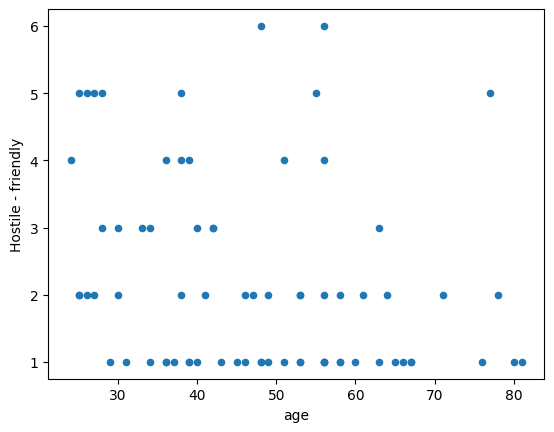

In [ ]:
number_split.plot.scatter(x='age', y='Hostile - friendly')

<Axes: xlabel='Hostile - friendly', ylabel='Authoritative -anarchic '>

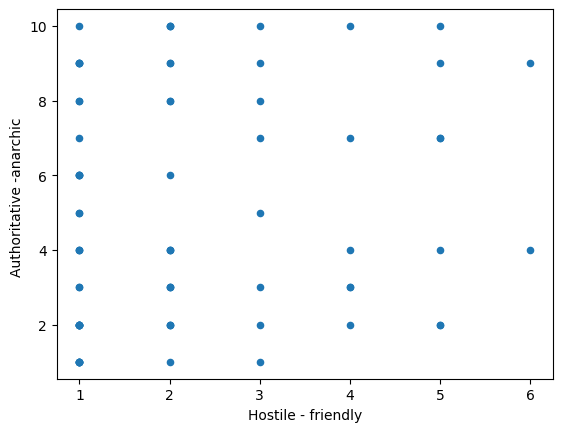

In [ ]:
number_split.plot.scatter(x='Hostile - friendly', y='Authoritative -anarchic ')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='Tense - relaxed', ylabel='age'>,
        <Axes: xlabel='Authoritative -anarchic ', ylabel='age'>,
        <Axes: xlabel='Hostile - friendly', ylabel='age'>,
        <Axes: xlabel='Type of Client', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='Tense - relaxed'>,
        <Axes: xlabel='Tense - relaxed', ylabel='Tense - relaxed'>,
        <Axes: xlabel='Authoritative -anarchic ', ylabel='Tense - relaxed'>,
        <Axes: xlabel='Hostile - friendly', ylabel='Tense - relaxed'>,
        <Axes: xlabel='Type of Client', ylabel='Tense - relaxed'>],
       [<Axes: xlabel='age', ylabel='Authoritative -anarchic '>,
        <Axes: xlabel='Tense - relaxed', ylabel='Authoritative -anarchic '>,
        <Axes: xlabel='Authoritative -anarchic ', ylabel='Authoritative -anarchic '>,
        <Axes: xlabel='Hostile - friendly', ylabel='Authoritative -anarchic '>,
        <Axes: xlabel='Type of Client', ylabel='Authoritative -anarchic 

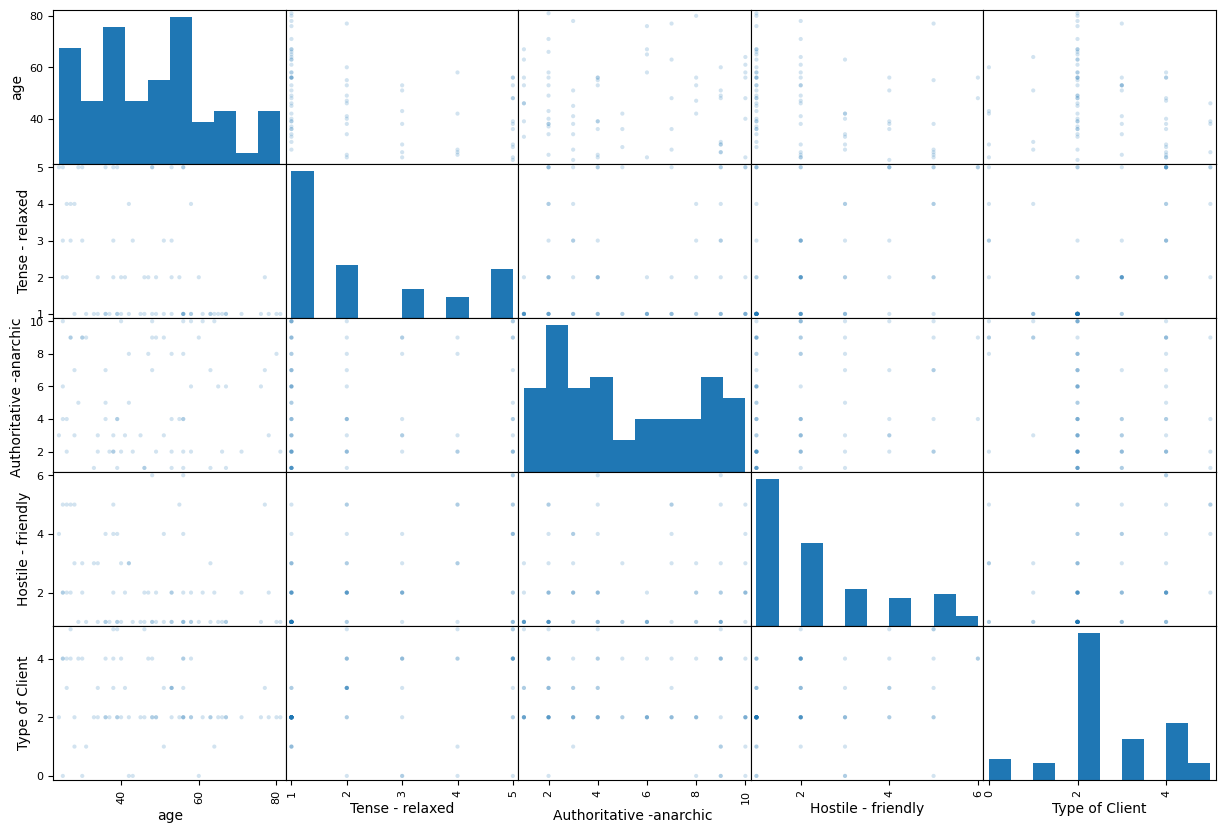

In [ ]:
#Visualization of scatter plot for all the columns
pd.plotting.scatter_matrix(number_split, alpha=0.2, figsize=(15, 10))

## Correlation

In [ ]:
#list of numeric attributes
numeric_df = tourist_df.select_dtypes(include=['float64', 'int64'])


In [ ]:
print(numeric_df.columns)


Index(['age', 'Tense - relaxed', 'Authoritative -anarchic ',
       'Hostile - friendly', 'Type of Client'],
      dtype='object')


In [ ]:
correlation_matrix = numeric_df.corr()

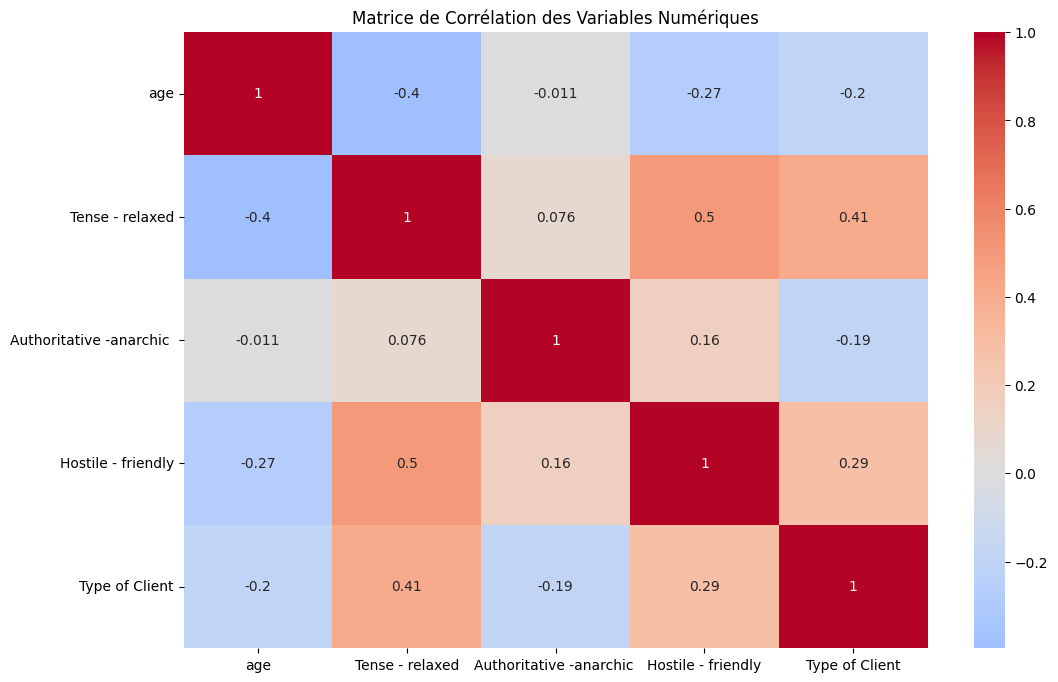

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()


**Interpret:**

The heatmap indicates minimal correlations between most variables, suggesting a lack of strong relationships and relative independence among the attributes.

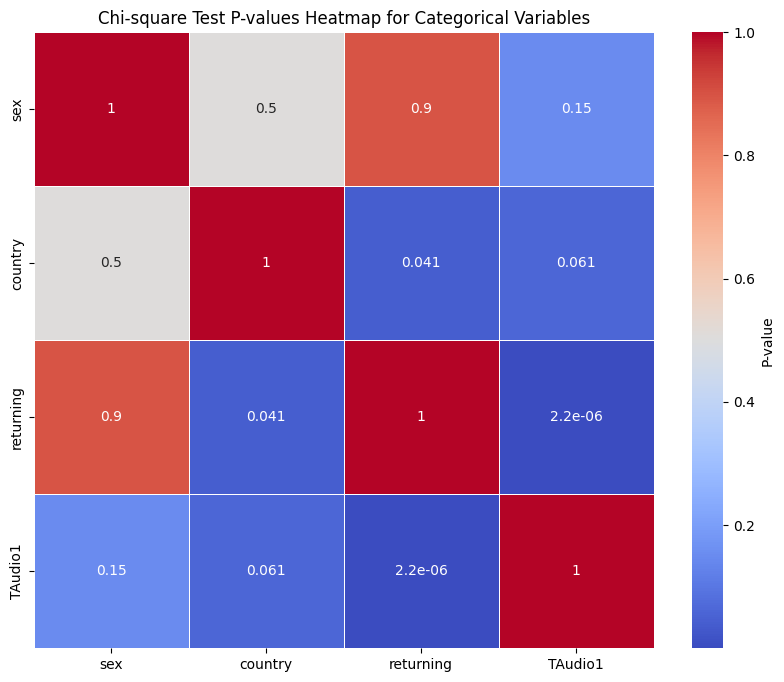

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency


# Select categorical columns
categorical_cols = ['sex', 'country', 'returning', 'TAudio1']

# Initialize an empty DataFrame to store p-values
p_values = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate p-values for each pair of categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(tourist_df[col1], tourist_df[col2])
            _, p_val, _, _ = chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p_val
        else:
            p_values.loc[col1, col2] = 1  # Set diagonal to 1 as a reference

# Convert p-values to numeric and fill NaN values (if any) with 1 for the heatmap
p_values = p_values.astype(float).fillna(1)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-value'}, linewidths=0.5)
plt.title("Chi-square Test P-values Heatmap for Categorical Variables")
plt.show()


**Interpret:**

The heatmap indicates minimal correlations between most variables, except for the  attributes returning and gender

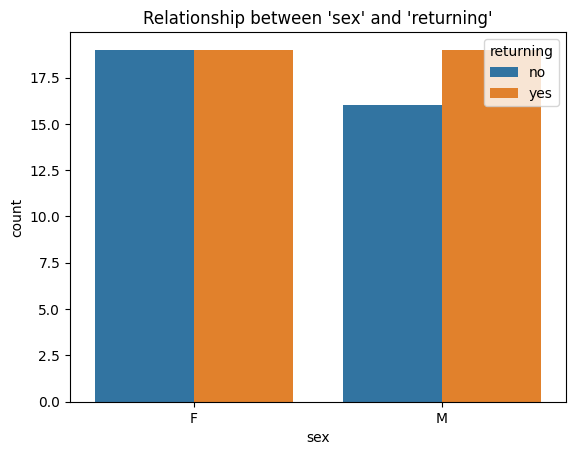

In [ ]:
# Example: Visualize the relationship between two significantly correlated variables
sns.countplot(data=tourist_df, x='sex', hue='returning')
plt.title("Relationship between 'sex' and 'returning'")
plt.show()


## Target

Class Distribution:
Type of Client
2    36
4    14
3    10
0     5
1     4
5     4
Name: count, dtype: int64

Class Percentage:
Type of Client
2    49.315068
4    19.178082
3    13.698630
0     6.849315
1     5.479452
5     5.479452
Name: count, dtype: float64


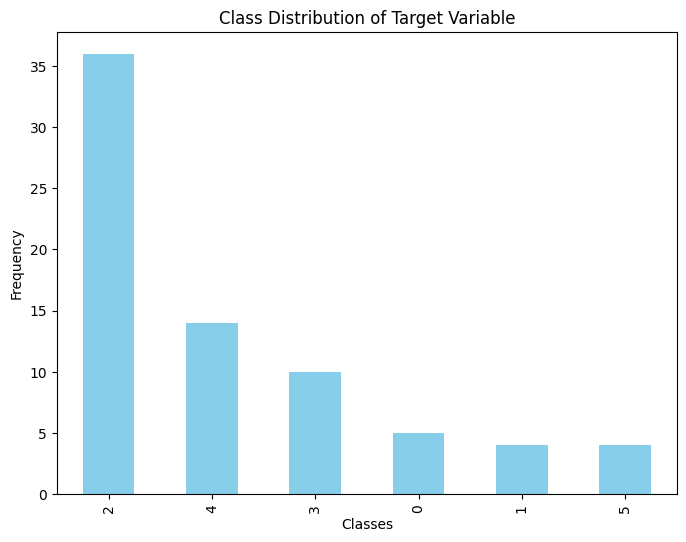

The target variable is inbalanced.


In [ ]:
target_counts = tourist_df['Type of Client'].value_counts()

# Display class distribution
print("Class Distribution:")
print(target_counts)

# Calculate the percentage of each class
class_percentage = target_counts / len(tourist_df) * 100
print("\nClass Percentage:")
print(class_percentage)

# Plot the class distribution
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title("Class Distribution of Target Variable")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Check for balance
if class_percentage.min() < 10:  # Threshold can vary; typically, below 10% indicates imbalance
    print("The target variable is inbalanced.")
else:
    print("The target variable is balanced.")

## Data Augmentation

In [ ]:


tourist_df_augmented = tourist_df.copy()


augmented_data = tourist_df_augmented.copy()
numerical_columns = ['Tense - relaxed', 'Hostile - friendly']
for col in numerical_columns:
    augmented_data[col] = augmented_data[col] + pd.Series(
        np.random.randint(-1, 2, size=augmented_data[col].shape)
    )

# augment by Shuffling categorical values within the same column
categorical_columns = ['sex', 'country', 'returning']
for col in categorical_columns:
    augmented_data[col] = augmented_data[col].sample(frac=1).reset_index(drop=True)


final_data = pd.concat([tourist_df_augmented, augmented_data], ignore_index=True)

final_data.to_csv('augmented_dataset.csv', index=False)


# Smoothing noise

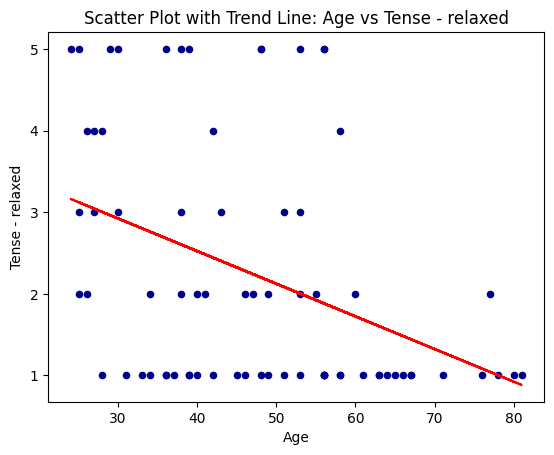

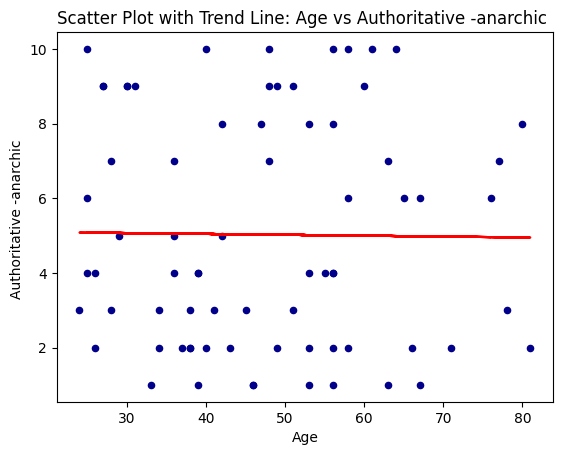

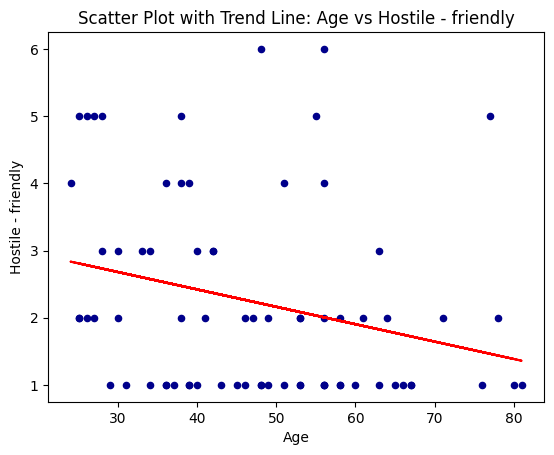

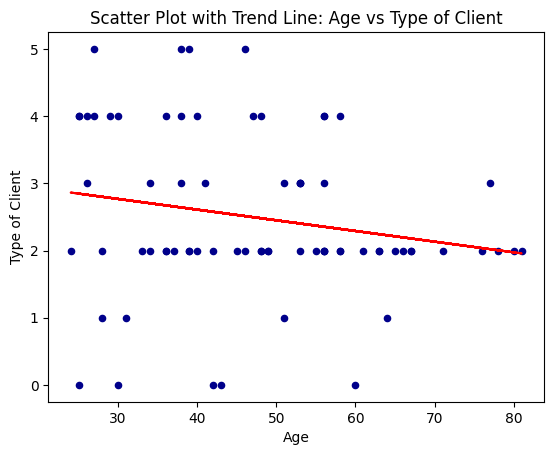

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for column in numeric_df.columns:
    if column != 'age':
        # Scatter plot with 'age' on the x-axis and each numeric column on the y-axis
        numeric_df.plot.scatter(x='age', y=column, color='DarkBlue')

        x = np.array(numeric_df['age'])
        y = np.array(numeric_df[column])

        # Calculate the line of best fit
        a, b = np.polyfit(x, y, 1)

        plt.plot(x, a * x + b, color='red', label='Line of Best Fit')

        plt.title(f'Scatter Plot with Trend Line: Age vs {column}')
        plt.xlabel('Age')
        plt.ylabel(column)

        plt.show()


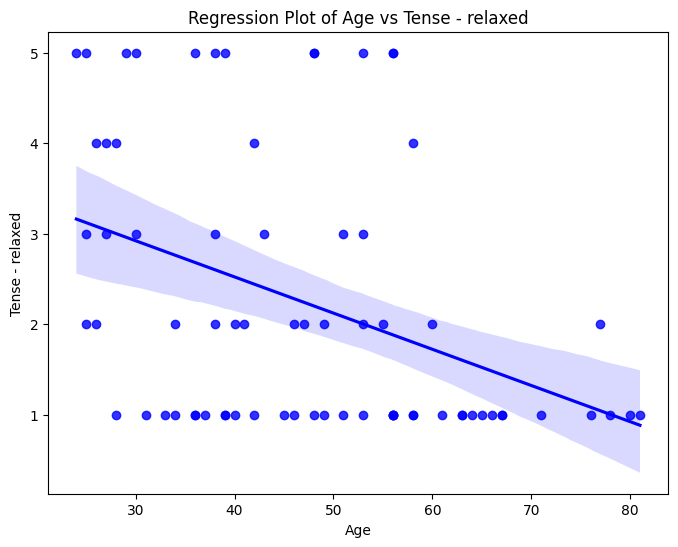

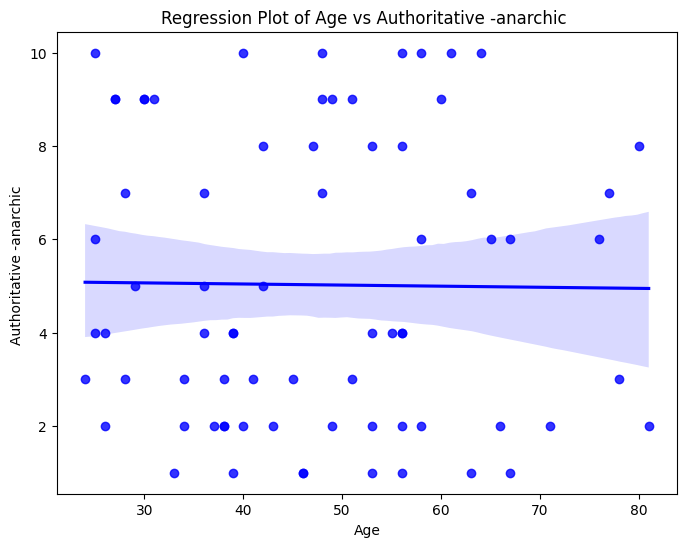

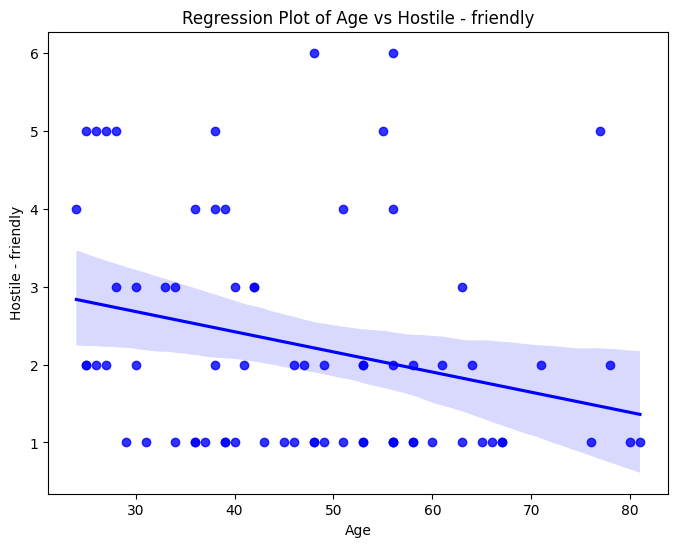

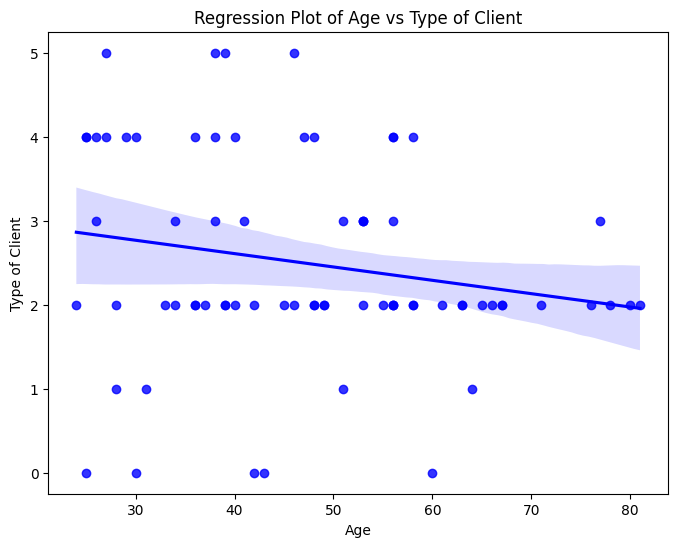

In [ ]:
x = np.array(numeric_df['age'])

for column in numeric_df.columns:
    if column != 'age':
        y = np.array(numeric_df[column])

        # Plot with Seaborn's regplot
        plt.figure(figsize=(8, 6))
        sns.regplot(x=x, y=y, color='Blue')
        plt.xlabel('Age')
        plt.ylabel(column)
        plt.title(f'Regression Plot of Age vs {column}')
        plt.show()


**Interpret:**

The overall lack of trend and the uncertainty around the regression lines indicate that there is no meaningful relationship between "age" and other numerical variables

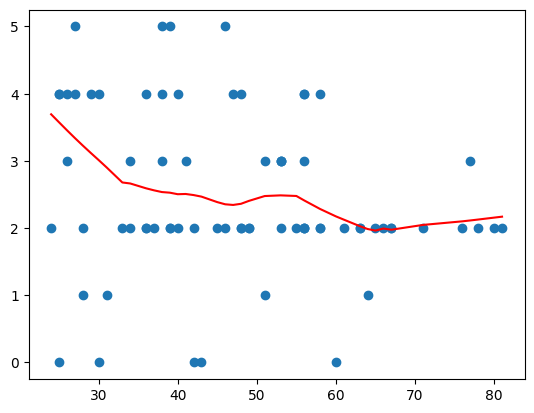

In [ ]:
import statsmodels.api as sm

x = np.array(numeric_df['age'])
lowess = sm.nonparametric.lowess(y, x, frac=0.4)
plt.scatter(x, y)
plt.plot(lowess[:, 0], lowess[:, 1], c='red')
plt.show()


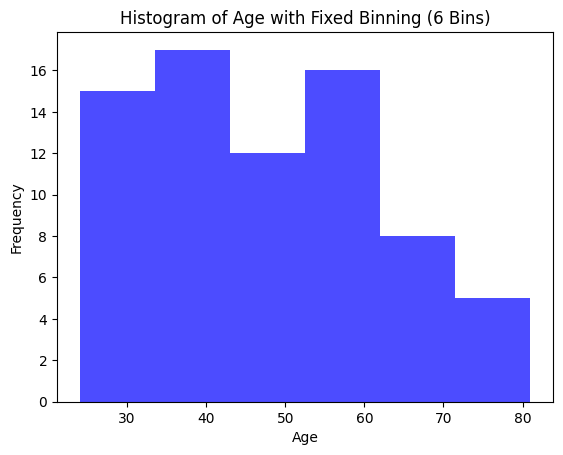

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic

# Smoothing noisy data with fixed binning
num_bins = 6
result = binned_statistic(numeric_df['age'], numeric_df['age'], bins=num_bins, statistic='mean')
bin_edges = result.bin_edges
bin_means = result.statistic

# Plotting the histogram based on the fixed number of bins
plt.hist(numeric_df['age'], bins=bin_edges, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Fixed Binning (6 Bins)')
plt.show()


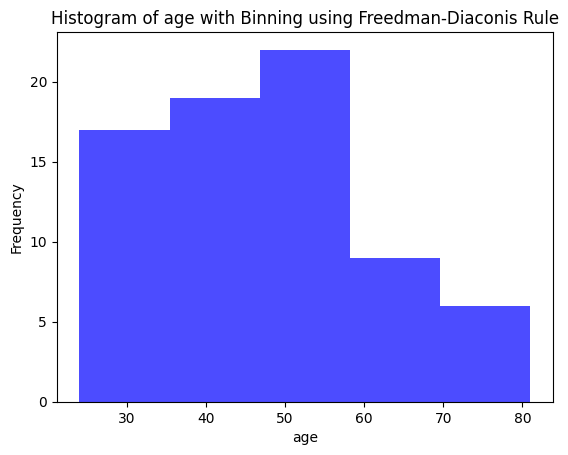

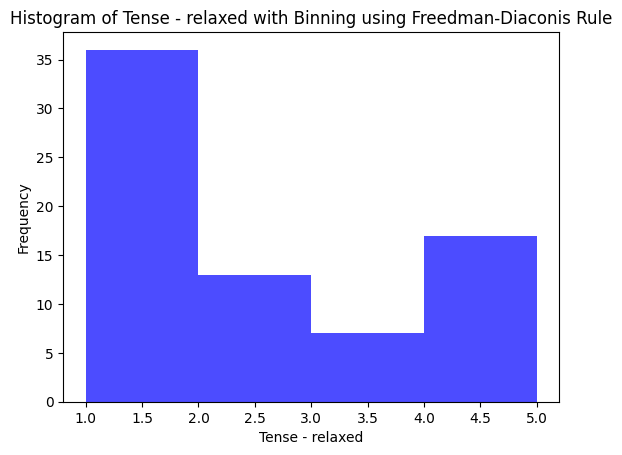

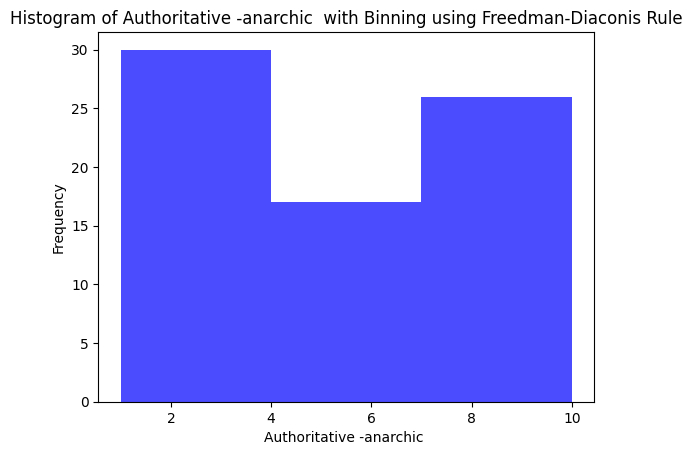

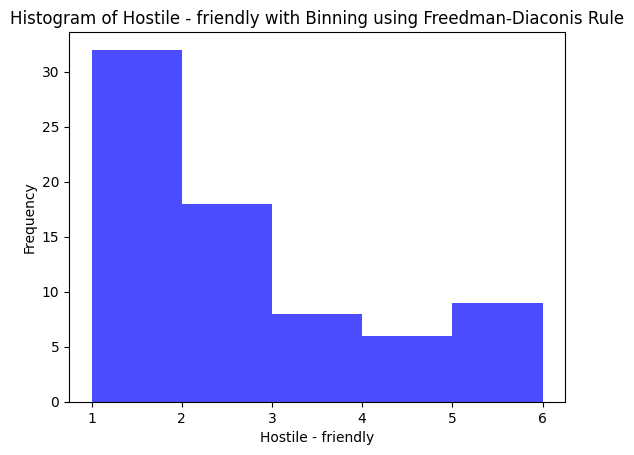

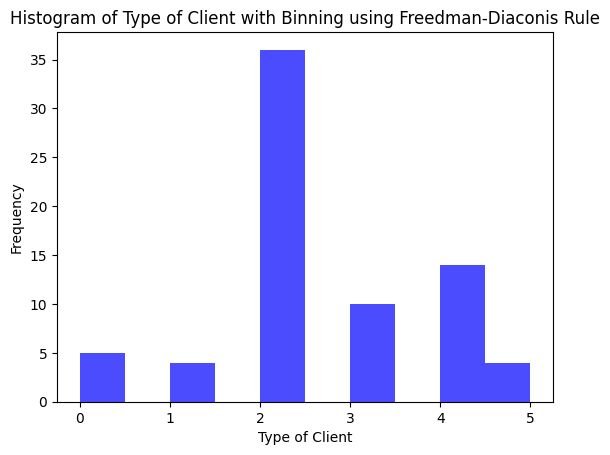

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic

# Loop through each numeric column
for column in numeric_df.columns:
    # Calculate bin width and number of bins using Freedman-Diaconis rule
    IQR = numeric_df[column].quantile(0.75) - numeric_df[column].quantile(0.25)
    bin_width = 2 * IQR / np.cbrt(len(numeric_df[column]))

    # Ensure bin width is not zero to avoid infinite bins
    if bin_width > 0:
        num_bins = int((numeric_df[column].max() - numeric_df[column].min()) / bin_width)
    else:
        num_bins = 1  # Set to 1 bin if data is constant or all values are the same

    # Smoothing noisy data with binning
    result = binned_statistic(numeric_df[column], numeric_df[column], bins=num_bins, statistic='mean')
    bin_edges = result.bin_edges
    bin_means = result.statistic

    # Plotting the histogram based on bin means
    plt.hist(numeric_df[column], bins=bin_edges, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} with Binning using Freedman-Diaconis Rule')
    plt.show()


#Dimensionality reduction

Optimal number of components to retain: 2


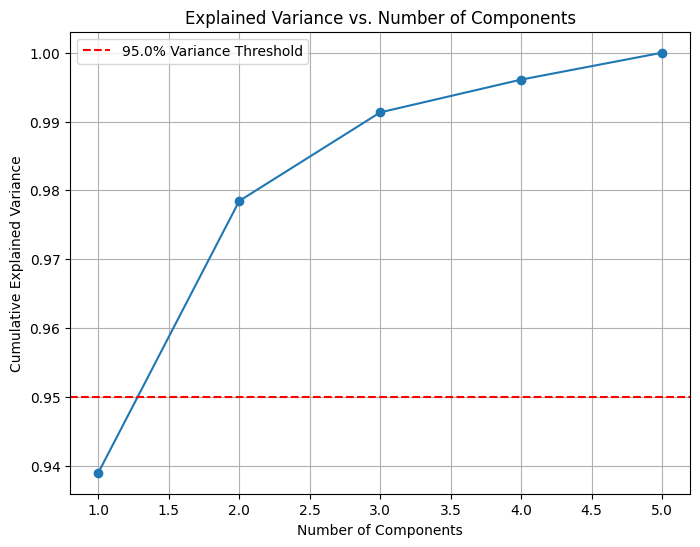

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)
# Set the threshold for the cumulative explained variance (e.g., 95%)
variance_threshold = 0.95

# Fit PCA to the data to compute explained variance ratios
pca = PCA().fit(numeric_df)  # Fit PCA on the original numeric data

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that capture the desired variance threshold
optimal_components = np.argmax(cumulative_variance >= variance_threshold) + 1
print(f'Optimal number of components to retain: {optimal_components}')

# Plot cumulative explained variance to visualize
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Now we apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
df_pca_optimal = pca_optimal.fit_transform(numeric_df)

# Convert the transformed data into a DataFrame and print
pca_columns = [f'PC{i+1}' for i in range(optimal_components)]  # Name columns as PC1, PC2, etc.
df_pca_optimal = pd.DataFrame(df_pca_optimal, columns=pca_columns)

print(f'\nDataset after PCA with {optimal_components} components:')
print(df_pca_optimal.head(73))  # Display the first few rows of the transformed dataset


Dataset after PCA with 2 components:
          PC1       PC2
0   -5.312341  3.267496
1   12.795130  4.081357
2  -22.388299  5.386848
3   -4.205537 -2.907004
4  -17.258931  4.145320
..        ...       ...
68 -11.433172  2.067330
69  -9.465468 -2.865806
70  -1.273329 -4.229549
71  -8.445578 -0.969124
72 -20.428548  3.966790

[73 rows x 2 columns]


In [ ]:
# Get the components (loadings)
components_df = pd.DataFrame(pca.components_, columns=numeric_df.columns)

# Show the components for the first two principal components
print("Principal Component Loadings (first two components):")
print(components_df.iloc[:2])  # Display the first two components

# Optional: Display most influential features in each component
for i in range(2):  # Only the first two components
    print(f"\nMost influential features in Principal Component {i + 1}:")
    top_features = components_df.iloc[i].abs().sort_values(ascending=False).head(3)
    print(top_features)


Principal Component Loadings (first two components):
        age  Tense - relaxed  Authoritative -anarchic   Hostile - friendly  Type of Client
0  0.998705        -0.040405                 -0.002532           -0.026250       -0.016119
1  0.005563         0.046954                  0.991535            0.091951       -0.078539

Most influential features in Principal Component 1:
age                   0.998705
Tense - relaxed       0.040405
Hostile - friendly    0.026250
Name: 0, dtype: float64

Most influential features in Principal Component 2:
Authoritative -anarchic     0.991535
Hostile - friendly          0.091951
Type of Client              0.078539
Name: 1, dtype: float64


# Classification

In [ ]:
tourist_df_copy = tourist_df.copy()
tourist_df_copy.shape

(73, 23)

In [ ]:
tourist_df_copy = tourist_df.drop('country' , axis=1)


**Interpretations:** This code creates a mapping where the values 'dislikes', 'indiferent', and 'likes' are replaced by -1, 0, and 1, respectively. It then applies this mapping to the specified columns in the tourist_df DataFrame, updating those columns with the corresponding numerical values.

In [ ]:
value_mapping = {
    'dislikes': -1,
    'indiferent': 0,
    'likes': 1
}

columns_to_map = ['GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3',
                  'PImg4', 'PImg5', 'TAudio1', 'TAudio2', 'TAudio3',
                  'QAudio1', 'QAudio2', 'QAudio3','Proxemics']

tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)

<ipython-input-474-636588b749d7>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)


 In this code, the missing values represented by '?' in the attributes 'GImg3' and 'PImg5' are being replaced with the mode (most frequent value) of each respective column, ensuring that missing data is filled with a common and representative value.

In [ ]:
colonnes_a_traiter = ['GImg3', 'PImg5', 'Authoritative -anarchic ']
for column in colonnes_a_traiter:
    mode = tourist_df_copy[column][tourist_df_copy[column] != '?'].mode()[0]  # Calculer le mode sans inclure '?'
    tourist_df_copy[column] = tourist_df_copy[column].replace('?', mode)      # Remplacer '?' par le mode
# Remplacement de '?' par 2
#tourist_df_copy['Authoritative -anarchic '] = tourist_df_copy['Authoritative -anarchic '].replace('?', 2)

# Conversion en type numérique
#tourist_df_copy['Authoritative -anarchic '] = pd.to_numeric(tourist_df_copy['Authoritative -anarchic '])

<ipython-input-475-9862856bd2e0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tourist_df_copy[column] = tourist_df_copy[column].replace('?', mode)      # Remplacer '?' par le mode


In [ ]:
tourist_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   returning                 73 non-null     object
 3   GImg1                     73 non-null     int64 
 4   GImg2                     73 non-null     int64 
 5   GImg3                     73 non-null     int64 
 6   PImg1                     73 non-null     int64 
 7   PImg2                     73 non-null     int64 
 8   PImg3                     73 non-null     int64 
 9   PImg4                     73 non-null     int64 
 10  PImg5                     73 non-null     int64 
 11  Tense - relaxed           73 non-null     int64 
 12  Authoritative -anarchic   73 non-null     int64 
 13  Hostile - friendly        73 non-null     int64 
 14  TAudio1                   73

In [ ]:
#change sex to numeric attribute
value_mapping = {
    'F': 1,
    'M': 0,
}

columns_to_map = ['sex']
tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)

<ipython-input-477-a90393e51ad1>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)


In [ ]:
#change TAudio1 to numeric attribute
value_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,

}

columns_to_map = ['TAudio1']

tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)

<ipython-input-478-da43721b9827>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)


In [ ]:
#change returning to numeric attribute
value_mapping = {
    'yes': 1,
    'no': 0,


}

columns_to_map = ['returning']

tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)

<ipython-input-479-cb3a0b1413ee>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tourist_df_copy[columns_to_map] = tourist_df_copy[columns_to_map].replace(value_mapping)


In [ ]:
#splitting the dataset into training set and test set after isolating the type of client
x= tourist_df_copy.iloc[:, :-1]
y= tourist_df_copy["Type of Client"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_test.value_counts()

,count
Type of Client,
2,7
4,3
0,2
5,1
3,1
1,1


In [ ]:
#Checking the shapes of the new subsets for training and testing
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(58, 21) (58,)
(15, 21) (15,)


**Interpretations:** \

    `criterion='entropy'`, Splits nodes using the Gini impurity.

    `splitter='random'`, Chooses the best split.

    `max_depth=None`, Allows the tree to grow until all leaves are pure or contain less than
    `min_samples_split` samples.

    `min_samples_split=3`, The minimum number of samples required to split an internal node.

    `random_state=42`, Ensures reproducibility of the results.

In [ ]:
#Decision Tree Classifier
model1 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=3, random_state=42) #default values
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

 **Accuracy** = (TP + TN)/(N + P)\
 **Precision** = TP/(TP + FP)\
 **Recall** = TP/P\
 **f1-score** = 2*precision * recall/(precision + recall )

In [ ]:
#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         1
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         1

    accuracy                           0.80        15
   macro avg       0.65      0.61      0.62        15
weighted avg       0.81      0.80      0.80        15



[Text(0.58, 0.9285714285714286, 'x[4] <= 0.242\nentropy = 2.035\nsamples = 58\nvalue = [3, 3, 29, 9, 11, 3]'),
 Text(0.32, 0.7857142857142857, 'x[8] <= -0.685\nentropy = 2.14\nsamples = 29\nvalue = [3, 0, 5, 7, 11, 3]'),
 Text(0.44999999999999996, 0.8571428571428572, 'True  '),
 Text(0.16, 0.6428571428571429, 'x[3] <= -0.517\nentropy = 1.287\nsamples = 14\nvalue = [0, 0, 0, 2, 9, 3]'),
 Text(0.08, 0.5, 'x[15] <= -0.823\nentropy = 0.811\nsamples = 4\nvalue = [0, 0, 0, 0, 1, 3]'),
 Text(0.04, 0.35714285714285715, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 3]'),
 Text(0.12, 0.35714285714285715, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.24, 0.5, 'x[0] <= 0.522\nentropy = 0.722\nsamples = 10\nvalue = [0, 0, 0, 2, 8, 0]'),
 Text(0.2, 0.35714285714285715, 'x[9] <= -0.557\nentropy = 1.0\nsamples = 4\nvalue = [0, 0, 0, 2, 2, 0]'),
 Text(0.16, 0.21428571428571427, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(0.24, 0.21428571428571427, 'entro

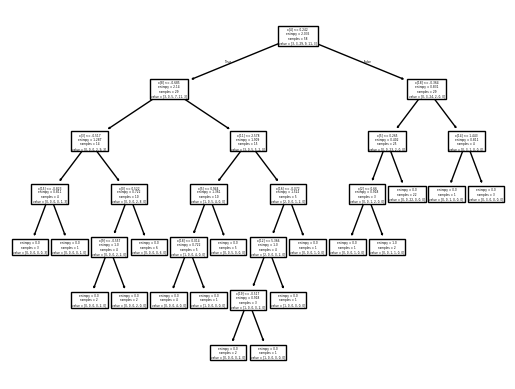

In [ ]:
#Tree visualization
plot_tree(model1)

In [ ]:
#Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
pd.DataFrame(conf_matrix, columns=list(range(0,6)))

Confusion Matrix:


,0,1,2,3,4,5
0,2,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,7,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,2,1
5,0,0,0,1,0,0


# Random Forest

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'target' is the label column and 'X' is the feature DataFrame
# Replace 'target_column' with the actual column name for your target variable
X = tourist_df_copy.drop(columns=['Type of Client'])
y = tourist_df_copy['Type of Client']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, max_features = None, min_samples_split = 5, n_estimators = 200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.73
Confusion Matrix:
 [[ 1  0  0  0  1  0]
 [ 0  0  1  0  0  0]
 [ 0  0 10  1  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  1  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.83      0.91      0.87        11
           3       0.33      0.50      0.40         2
           4       0.67      1.00      0.80         4
           5       0.00      0.00      0.00         2

    accuracy                           0.73        22
   macro avg       0.47      0.48      0.46        22
weighted avg       0.66      0.73      0.68        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
